# A Guide for Linear Regression Using Python

This comes from the part 2 series from [Piush Vaish - A Data Analysis](https://adataanalyst.com/machine-learning/guide-for-linear-regression-using-python-part-2/)

![](https://i1.wp.com/adataanalyst.com/wp-content/uploads/2017/08/Guide-for-Linear-Regression-using-Python.png?w=688&ssl=1)

### Loading Libraries

In [11]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots
#plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings('ignore') 

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Loading the Diamonds Dataset

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv")
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print ("\n\n---------------------")
print ("TRAIN SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", train.shape, "\n")
print ("Column Headers:", list(train.columns.values), "\n")
print (train.dtypes)



---------------------
TRAIN SET INFORMATION
---------------------
Shape of training set: (53940, 10) 

Column Headers: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'] 

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


So there are 53940 number of observations and 10 different variables.

In [4]:
import re
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in train:
    # Find all the unique feature values
    uniq = train[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAINING SET INFORMATION

'carat' has 273 unique values
~~Listing up to 10 unique values~~
[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32]

-----------------------------------------------------------------------

'cut' has 5 unique values
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

-----------------------------------------------------------------------

'color' has 7 unique values
['E' 'I' 'J' 'H' 'F' 'G' 'D']

-----------------------------------------------------------------------

'clarity' has 8 unique values
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']

-----------------------------------------------------------------------

'depth' has 184 unique values
~~Listing up to 10 unique values~~
[61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4]

-----------------------------------------------------------------------

'table' has 127 unique values
~~Listing up to 10 unique values~~
[55. 61. 65. 58. 57. 56. 54. 62. 59. 63.]

----------------------------------------------------

In [5]:
# Check for duplicate index or rows
idsUnique = len(set(train.index))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 53940 total entries


In [6]:
#Check when a value in a cloumn is zero
train[(train['z'] == 0)].count()

carat      20
cut        20
color      20
clarity    20
depth      20
table      20
price      20
x          20
y          20
z          20
dtype: int64

In [8]:
#Separate carat and price
df = train[['carat','price']]
df.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


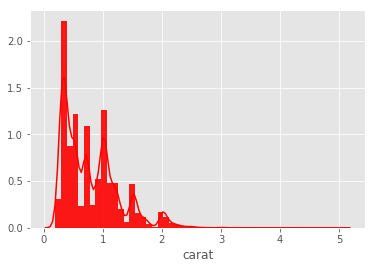

In [12]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(df['carat'], kde = True, color = 'r', hist_kws={'alpha': 0.9})

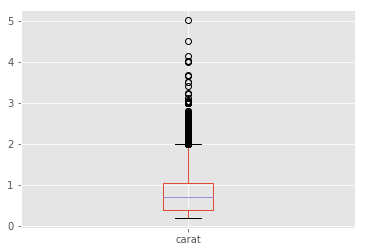

In [13]:
train.boxplot(column="carat")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1693E6D68>,
      dtype=object)

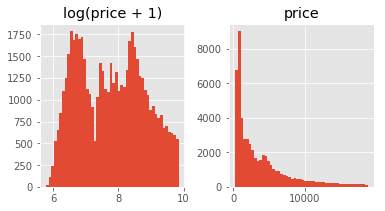

In [14]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
prices = pd.DataFrame({"price":train["price"], "log(price + 1)":np.log1p(train["price"])})
prices.hist(bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F169819D30>,
      dtype=object)

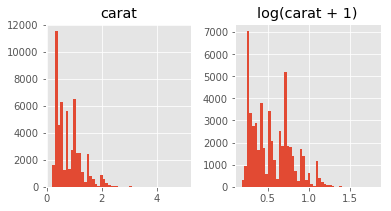

In [15]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
carat = pd.DataFrame({"carat":train["carat"], "log(carat + 1)":np.log1p(train["carat"])})
carat.hist(bins = 50)

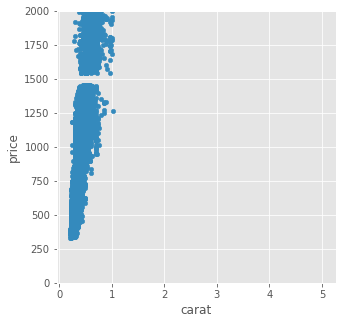

In [16]:
train.plot(kind="scatter",     # Create a scatterplot
              x="carat",          # Put carat on the x axis
              y="price",          # Put price on the y axis
              figsize=(5,5),
              ylim=(0,2000))  

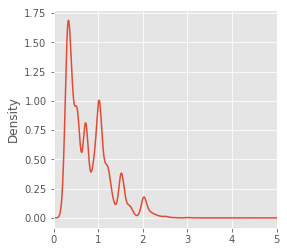

In [17]:
df["carat"].plot(kind="density",  # Create density plot
                      figsize=(4,4),    # Set figure size
                      xlim= (0,5))      # Limit x axis values

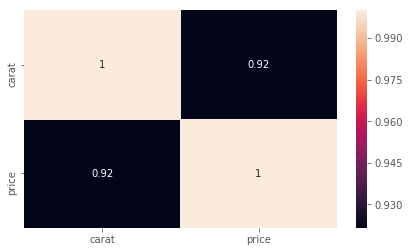

In [18]:
correlationMatrix = df.corr().abs()

plt.subplots(figsize=(7, 4))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

The above plot show 92% correlation between price and carat. It’s up to us if we should consider this correlation % as a damaging level. Usually, correlation above 80% (subjective) is considered higher, hence, we will not forego this combination.

---
## Linear Regression

In [19]:
print ("OLS regression model for the association between price and carat")
# reg1 is the model name , followed by equal sign. 
reg1 = smf.ols(formula = 'price ~ carat', data=df).fit()
# print the result
print (reg1.summary())

OLS regression model for the association between price and carat
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Thu, 31 Jan 2019   Prob (F-statistic):               0.00
Time:                        05:32:05   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

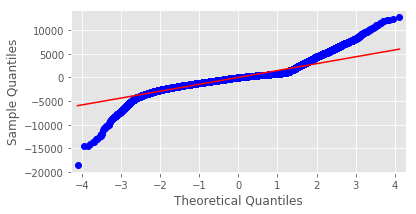

In [20]:
#Q-Q plot for normality
fig4=sm.qqplot(reg1.resid, line='r')

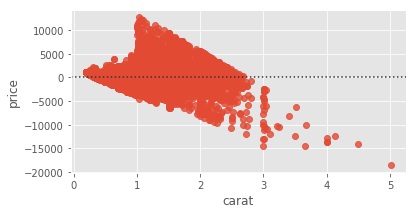

In [21]:
# simple plot of residuals
sns.residplot('carat','price', data=df)

Among all, Residual vs. Fitted value catches my attention. Not exactly though, but I see signs of heteroskedasticity in this data. Remember funnel shape? You can see a similar pattern. To overcome this situation, we’ll build another model with log(y).

In [22]:
df['log_price'] = np.log(1+df.price)
df['log_carat'] = np.log(1+df.carat)

print ("OLS regression model for the association between price and carat")
# reg_log is the model name , followed by equal sign.

reg_log = smf.ols(formula = 'log_price ~ carat', data=df).fit()
# print the result
print (reg_log.summary())


OLS regression model for the association between price and carat
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 2.983e+05
Date:                Thu, 31 Jan 2019   Prob (F-statistic):               0.00
Time:                        05:34:50   Log-Likelihood:                -26685.
No. Observations:               53940   AIC:                         5.337e+04
Df Residuals:                   53938   BIC:                         5.339e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

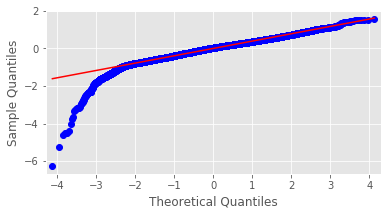

In [23]:
#Q-Q plot for normality
fig4=sm.qqplot(reg_log.resid, line='r')

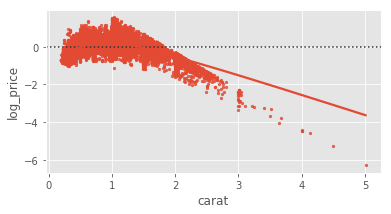

In [24]:
sns.residplot('carat','log_price', data=df,lowess= True, scatter_kws={"s": 5})

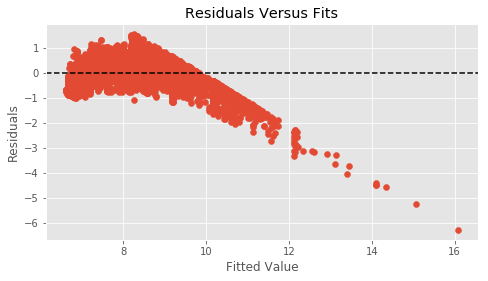

In [25]:
fitted = 6.2164 + 1.9688*df["carat"] # This just needs to be whatever the linear regrsssion equation is
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.0, 1.0]) 
axes.axhline(color="black", ls="--") # This creates a horizon line (like abline in R)
axes.set_xlabel('Fitted Value')
axes.set_ylabel('Residuals')
axes.set_title('Residuals Versus Fits')
axes.scatter(fitted, df["log_price"]  - fitted, marker = "o")

## ANOVA for Linear Regression

In [29]:
model = smf.ols('log_price ~ carat', data=df)
sm.stats.anova_lm(model.fit())

,df,sum_sq,mean_sq,F,PR(>F)
carat,1.0,46977.568051,46977.568051,298297.137856,0.0
Residual,53938.0,8494.469923,0.157486,NaN,NaN


In [30]:
df_low_carat = df[df["carat"]< 0.75]

print ("OLS regression model for the association between price and carat")
# reg_log is the model name , followed by equal sign.

reg_log_low = smf.ols(formula = 'log_price ~ carat', data=df_low_carat).fit()
# print the result
print (reg_log_low.summary())

OLS regression model for the association between price and carat
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 1.337e+05
Date:                Thu, 31 Jan 2019   Prob (F-statistic):               0.00
Time:                        05:37:48   Log-Likelihood:                -24.378
No. Observations:               30034   AIC:                             52.76
Df Residuals:                   30032   BIC:                             69.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

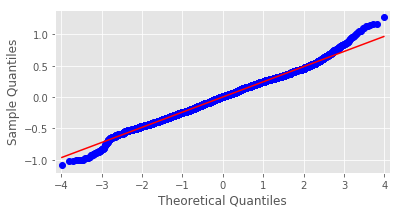

In [31]:
#Q-Q plot for normality
fig4=sm.qqplot(reg_log_low.resid, line='r')

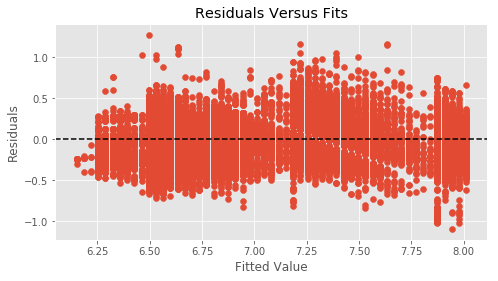

In [32]:
fitted = 5.4605 + 3.4493*df_low_carat["carat"] # This just needs to be whatever the linear regrsssion equation is
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.0, 1.0]) 
axes.axhline(color="black", ls="--") # This creates a horizon line (like abline in R)
axes.set_xlabel('Fitted Value')
axes.set_ylabel('Residuals')
axes.set_title('Residuals Versus Fits')
axes.scatter(fitted, df_low_carat["log_price"]  - fitted, marker = "o")